In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [2]:
data = pd.read_csv("3D Objects/stepic_data_set/archive/melb_data.csv")

In [3]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
answer = data['Price']

In [6]:
data = data.drop(columns='Price')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, answer, test_size=0.2)

In [26]:
x_train.isna()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
10149,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6914,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2652,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6354,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10406,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12969,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9267,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3829,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13241,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Distance'}>,
        <AxesSubplot:title={'center':'Postcode'}>],
       [<AxesSubplot:title={'center':'Bedroom2'}>,
        <AxesSubplot:title={'center':'Bathroom'}>,
        <AxesSubplot:title={'center':'Car'}>],
       [<AxesSubplot:title={'center':'Landsize'}>,
        <AxesSubplot:title={'center':'BuildingArea'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'Lattitude'}>,
        <AxesSubplot:title={'center':'Longtitude'}>,
        <AxesSubplot:title={'center':'Propertycount'}>]], dtype=object)

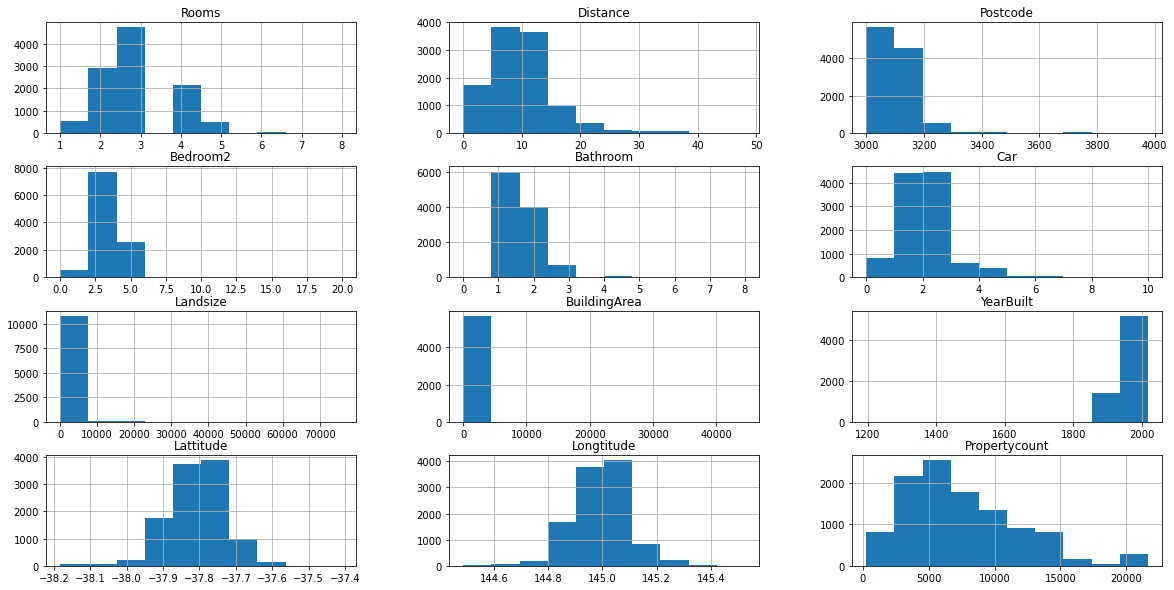

In [14]:
x_train.hist(figsize=(20, 10))

array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Distance'}>,
        <AxesSubplot:title={'center':'Postcode'}>],
       [<AxesSubplot:title={'center':'Bedroom2'}>,
        <AxesSubplot:title={'center':'Bathroom'}>,
        <AxesSubplot:title={'center':'Car'}>],
       [<AxesSubplot:title={'center':'Landsize'}>,
        <AxesSubplot:title={'center':'BuildingArea'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'Lattitude'}>,
        <AxesSubplot:title={'center':'Longtitude'}>,
        <AxesSubplot:title={'center':'Propertycount'}>]], dtype=object)

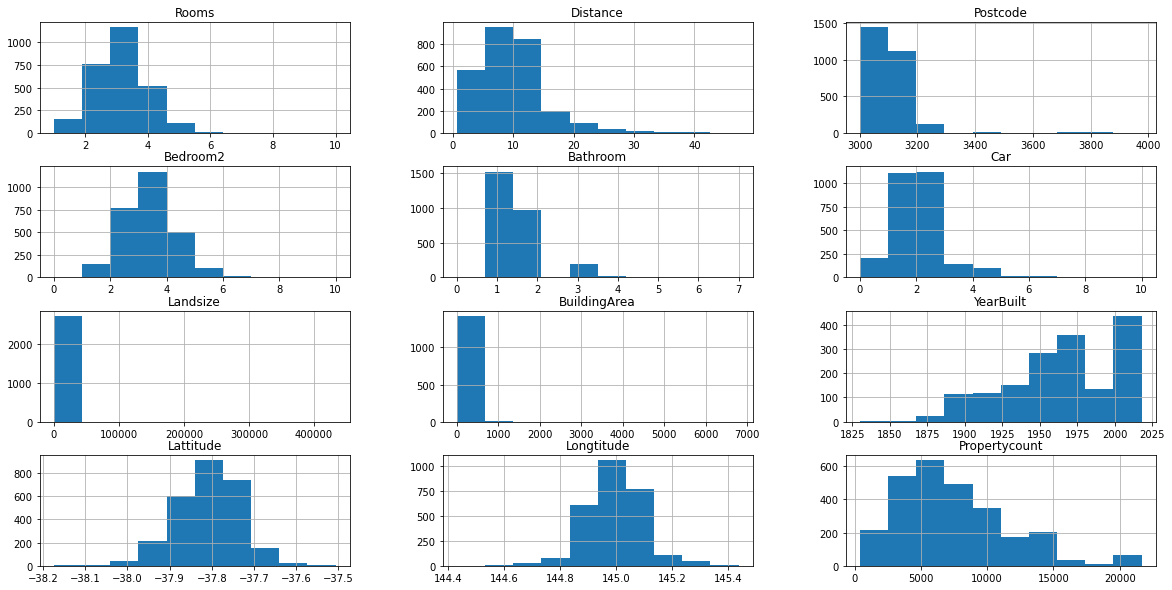

In [13]:
x_test.hist(figsize=(20, 10))

In [15]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 10149 to 179
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         10864 non-null  object 
 1   Address        10864 non-null  object 
 2   Rooms          10864 non-null  int64  
 3   Type           10864 non-null  object 
 4   Method         10864 non-null  object 
 5   SellerG        10864 non-null  object 
 6   Date           10864 non-null  object 
 7   Distance       10864 non-null  float64
 8   Postcode       10864 non-null  float64
 9   Bedroom2       10864 non-null  float64
 10  Bathroom       10864 non-null  float64
 11  Car            10812 non-null  float64
 12  Landsize       10864 non-null  float64
 13  BuildingArea   5700 non-null   float64
 14  YearBuilt      6580 non-null   float64
 15  CouncilArea    9772 non-null   object 
 16  Lattitude      10864 non-null  float64
 17  Longtitude     10864 non-null  float64
 18  Regi

In [63]:
x_train['Car'] = x_train['Car'].fillna(x_train['Car'].median())
x_train['BuildingArea'] = x_train['BuildingArea'].fillna(x_train['BuildingArea'].median())
x_train['YearBuilt'] = x_train['YearBuilt'].fillna(x_train['YearBuilt'].median())

most_frequent_value = x_train['CouncilArea'].value_counts().index[0]
x_train['CouncilArea'] = x_train['CouncilArea'].fillna(most_frequent_value)

C:\Users\79214\AppData\Local\Temp/ipykernel_11956/1428890805.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Car'] = x_test['Car'].fillna(x_train['Car'].median())
C:\Users\79214\AppData\Local\Temp/ipykernel_11956/1428890805.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['BuildingArea'] = x_test['BuildingArea'].fillna(x_train['BuildingArea'].median())
C:\Users\79214\AppData\Local\Temp/ipykernel_11956/1428890805.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

KeyError: 'CouncilArea'

In [ ]:
# # заводим KNNImputer. Его же вы будете использовать для заполнения пропусков в тестовых данных
# imputer = KNNImputer(n_neighbors=5)
# # Обучаем KNNImputer на X_train
# imputer.fit(X_train)
# # Получаем новый new_X_train — данные как X_train, только без пропусков
# new_X_train = imputer.transform(X_train)

In [25]:
x_train.isna().any()

Suburb           False
Address          False
Rooms            False
Type             False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
CouncilArea      False
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

In [28]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 10149 to 179
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         10864 non-null  object 
 1   Address        10864 non-null  object 
 2   Rooms          10864 non-null  int64  
 3   Type           10864 non-null  object 
 4   Method         10864 non-null  object 
 5   SellerG        10864 non-null  object 
 6   Date           10864 non-null  object 
 7   Distance       10864 non-null  float64
 8   Postcode       10864 non-null  float64
 9   Bedroom2       10864 non-null  float64
 10  Bathroom       10864 non-null  float64
 11  Car            10864 non-null  float64
 12  Landsize       10864 non-null  float64
 13  BuildingArea   10864 non-null  float64
 14  YearBuilt      10864 non-null  float64
 15  CouncilArea    10864 non-null  object 
 16  Lattitude      10864 non-null  float64
 17  Longtitude     10864 non-null  float64
 18  Regi

In [34]:
from collections import defaultdict
# создаем словарь {'Reservoir' : 1, 'Richmond' : 2, ...}
dict_ = defaultdict(int)
for i, x in enumerate(np.unique(x_train.Suburb)):
    dict_[x] = i+1

In [36]:
# к каждому значению в колонке Suburb применяем функцию, которая ставит этому значению в соответствие число из dict_
x_train['Suburb'] = x_train['Suburb'].apply(lambda x: dict_[x])

C:\Users\79214\AppData\Local\Temp/ipykernel_11956/3855078075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Suburb'] = x_train['Suburb'].apply(lambda x: dict_[x])


In [65]:
x_test['Suburb'] = x_test['Suburb'].apply(lambda x: dict_[x])

C:\Users\79214\AppData\Local\Temp/ipykernel_11956/4285070477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Suburb'] = x_test['Suburb'].apply(lambda x: dict_[x])


In [38]:
x_train.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
10149,42,181 Dendy St,4,h,VB,Biggin,27/05/2017,10.3,3187.0,4.0,3.0,2.0,592.0,126.75,1970.0,Bayside,-37.92173,145.01436,Southern Metropolitan,6938.0
6914,120,62 Dowding Cl,4,h,S,Stockdale,16/04/2016,12.4,3060.0,4.0,2.0,3.0,476.0,126.75,1977.0,Moreland,-37.69700,144.96550,Northern Metropolitan,5070.0
2652,125,202/51 Gordon St,1,u,PI,Burnham,3/09/2016,6.4,3011.0,1.0,1.0,0.0,0.0,126.75,2007.0,Maribyrnong,-37.79110,144.89000,Western Metropolitan,7570.0
6354,281,1/21 Bruce St,1,u,PI,Williams,7/05/2016,4.6,3142.0,1.0,1.0,1.0,0.0,38.00,1958.0,Stonnington,-37.83690,145.00770,Southern Metropolitan,7217.0
10406,195,1/10 Owen St,3,u,VB,Noel,27/05/2017,17.2,3132.0,3.0,1.0,2.0,439.0,110.00,1960.0,Whitehorse,-37.82596,145.18720,Eastern Metropolitan,6871.0


In [39]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()
le.fit(x_train['Method'])

LabelEncoder()

In [46]:
le.classes_

array(['PI', 'S', 'SA', 'SP', 'VB'], dtype=object)

In [48]:
x_train['Method'] = le.transform(x_train['Method'])

C:\Users\79214\AppData\Local\Temp/ipykernel_11956/3992042444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Method'] = le.transform(x_train['Method'])


In [68]:
x_test['Method'] = le.transform(x_test['Method'])

C:\Users\79214\AppData\Local\Temp/ipykernel_11956/3361309125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Method'] = le.transform(x_test['Method'])


In [49]:
x_train.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
10149,42,181 Dendy St,4,h,4,Biggin,27/05/2017,10.3,3187.0,4.0,3.0,2.0,592.0,126.75,1970.0,Bayside,-37.92173,145.01436,Southern Metropolitan,6938.0
6914,120,62 Dowding Cl,4,h,1,Stockdale,16/04/2016,12.4,3060.0,4.0,2.0,3.0,476.0,126.75,1977.0,Moreland,-37.69700,144.96550,Northern Metropolitan,5070.0
2652,125,202/51 Gordon St,1,u,0,Burnham,3/09/2016,6.4,3011.0,1.0,1.0,0.0,0.0,126.75,2007.0,Maribyrnong,-37.79110,144.89000,Western Metropolitan,7570.0
6354,281,1/21 Bruce St,1,u,0,Williams,7/05/2016,4.6,3142.0,1.0,1.0,1.0,0.0,38.00,1958.0,Stonnington,-37.83690,145.00770,Southern Metropolitan,7217.0
10406,195,1/10 Owen St,3,u,4,Noel,27/05/2017,17.2,3132.0,3.0,1.0,2.0,439.0,110.00,1960.0,Whitehorse,-37.82596,145.18720,Eastern Metropolitan,6871.0


In [50]:
np.unique(x_train['Regionname'])

array(['Eastern Metropolitan', 'Eastern Victoria',
       'Northern Metropolitan', 'Northern Victoria',
       'South-Eastern Metropolitan', 'Southern Metropolitan',
       'Western Metropolitan', 'Western Victoria'], dtype=object)

In [51]:
pd.get_dummies(x_train['Regionname'])

,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
10149,0,0,0,0,0,1,0,0
6914,0,0,1,0,0,0,0,0
2652,0,0,0,0,0,0,1,0
6354,0,0,0,0,0,1,0,0
10406,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
12969,0,0,0,0,0,0,1,0
9267,0,0,0,0,0,1,0,0
3829,0,0,0,0,0,1,0,0
13241,0,0,0,0,1,0,0,0


In [69]:
x_train = pd.get_dummies(x_train, columns=['Type', 'Regionname'])

KeyError: "None of [Index(['Type', 'Regionname'], dtype='object')] are in the [columns]"

In [70]:
x_test = pd.get_dummies(x_test, columns=['Type', 'Regionname'])

In [54]:
x_train.head()

,Suburb,Address,Rooms,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,...,Type_t,Type_u,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
10149,42,181 Dendy St,4,4,Biggin,27/05/2017,10.3,3187.0,4.0,3.0,...,0,0,0,0,0,0,0,1,0,0
6914,120,62 Dowding Cl,4,1,Stockdale,16/04/2016,12.4,3060.0,4.0,2.0,...,0,0,0,0,1,0,0,0,0,0
2652,125,202/51 Gordon St,1,0,Burnham,3/09/2016,6.4,3011.0,1.0,1.0,...,0,1,0,0,0,0,0,0,1,0
6354,281,1/21 Bruce St,1,0,Williams,7/05/2016,4.6,3142.0,1.0,1.0,...,0,1,0,0,0,0,0,1,0,0
10406,195,1/10 Owen St,3,4,Noel,27/05/2017,17.2,3132.0,3.0,1.0,...,0,1,1,0,0,0,0,0,0,0


In [55]:
x_train = x_train.drop(columns=['Address', 'Date', 'CouncilArea', 'SellerG'])

In [71]:
x_test = x_test.drop(columns=['Address', 'Date', 'CouncilArea', 'SellerG'])

In [57]:
x_train.head()

,Suburb,Rooms,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,...,Type_t,Type_u,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
10149,42,4,4,10.3,3187.0,4.0,3.0,2.0,592.0,126.75,...,0,0,0,0,0,0,0,1,0,0
6914,120,4,1,12.4,3060.0,4.0,2.0,3.0,476.0,126.75,...,0,0,0,0,1,0,0,0,0,0
2652,125,1,0,6.4,3011.0,1.0,1.0,0.0,0.0,126.75,...,0,1,0,0,0,0,0,0,1,0
6354,281,1,0,4.6,3142.0,1.0,1.0,1.0,0.0,38.00,...,0,1,0,0,0,0,0,1,0,0
10406,195,3,4,17.2,3132.0,3.0,1.0,2.0,439.0,110.00,...,0,1,1,0,0,0,0,0,0,0


In [58]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 10149 to 179
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Suburb                                 10864 non-null  int64  
 1   Rooms                                  10864 non-null  int64  
 2   Method                                 10864 non-null  int32  
 3   Distance                               10864 non-null  float64
 4   Postcode                               10864 non-null  float64
 5   Bedroom2                               10864 non-null  float64
 6   Bathroom                               10864 non-null  float64
 7   Car                                    10864 non-null  float64
 8   Landsize                               10864 non-null  float64
 9   BuildingArea                           10864 non-null  float64
 10  YearBuilt                              10864 non-null  float64
 11  

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [62]:
from sklearn.ensemble import  RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=7)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=7)

In [64]:
x_test['Car'] = x_test['Car'].fillna(x_train['Car'].median())
x_test['BuildingArea'] = x_test['BuildingArea'].fillna(x_train['BuildingArea'].median())
x_test['YearBuilt'] = x_test['YearBuilt'].fillna(x_train['YearBuilt'].median())
x_test['CouncilArea'] = x_test['CouncilArea'].fillna(most_frequent_value)

C:\Users\79214\AppData\Local\Temp/ipykernel_11956/3974282621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Car'] = x_test['Car'].fillna(x_train['Car'].median())
C:\Users\79214\AppData\Local\Temp/ipykernel_11956/3974282621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['BuildingArea'] = x_test['BuildingArea'].fillna(x_train['BuildingArea'].median())
C:\Users\79214\AppData\Local\Temp/ipykernel_11956/3974282621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [79]:
y_predicted_linreg = lr.predict(x_test)

In [80]:
y_predicted_linreg[:10]

array([1452063.67942989,  966341.15154339, 1557655.99015848,
        585928.00659004, 1281532.10262163, 1108557.35082024,
        385647.7951092 , 1476204.49473743, 1061627.0634446 ,
       1022796.74412724])

In [81]:
np.array(y_test)[:10]

array([1635000., 1130000., 1742000.,  878000.,  950000.,  850000.,
        676000., 1260000.,  840000.,  860000.])

In [82]:
y_predicted_rf = rf.predict(x_test)

In [83]:
y_predicted_rf[:10]

array([1336943.16500559,  916123.93944141, 2301010.3832588 ,
        664044.89017018,  926926.69811771, 1092157.94887092,
        505651.32192863, 1338694.55282235,  818656.9375447 ,
        726912.07134057])

In [84]:
np.array(y_test)[:10]

array([1635000., 1130000., 1742000.,  878000.,  950000.,  850000.,
        676000., 1260000.,  840000.,  860000.])

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [85]:
mean_absolute_error(y_predicted_linreg, y_test)

263135.91736069036

In [86]:
mean_squared_error(y_predicted_linreg, y_test)

140282125552.51688

In [87]:
mean_absolute_error(y_predicted_rf, y_test)

193179.1398851267

In [88]:
mean_squared_error(y_predicted_rf, y_test)

84744467674.42844